array x:  [4 5 5 5 6 7 7 8 8 8]
array y:  [ 2  2  3  3  7  8 13 15 19 20]


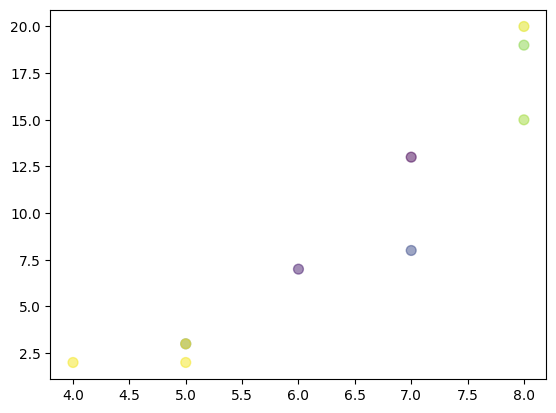

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Tạo 10 điểm dữ liệu tọa độ x ngẫu nhiên
x = []
for i in range(10):
    x.append(random.randint(1,10))
x.sort()
x=np.array(x)
# Tạo 10 điểm dữ liệu tọa độ y ngẫu nhiên
y = []
for i in range(10):
    y.append(random.randint(1, 20))
y.sort()
y=np.array(y)
print('array x: ',x)
print('array y: ',y)

n = np.size(x)
#Vẽ 10 chúng điểm lên tọa độ
colors = np.random.rand(n)
area = 50
plt.scatter(x, y, area, colors, alpha=0.5)

In [2]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x.reshape(-1,1), y)
#Tính w0,w1 dùng thư viện Sklearn
print('w1 theo công thức Sklearn :', reg.coef_[0])
print('w0 theo công thức Sklearn:', reg.intercept_)

w1 theo công thức Sklearn : 4.447761194029852
w0 theo công thức Sklearn: -18.820895522388064


In [3]:
#Tính w0,w1 với công thức slide 9
def linear_regression(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum([x[i] * y[i] for i in range(n)])
    sum_x_squared = sum([x[i] ** 2 for i in range(n)])

    w1 = (sum_xy - (1/n)*sum_x * sum_y) / (sum_x_squared - (1/n) * sum_x ** 2)
    w0 = (sum_y - w1 * sum_x) / n

    return w0, w1
w0ct,w1ct=linear_regression(x,y)
print('w1 theo công thức slide 9:', w1ct)
print('w0 theo công thức slide 9', w0ct)



w1 theo công thức slide 9: 4.447761194029857
w0 theo công thức slide 9 -18.8208955223881


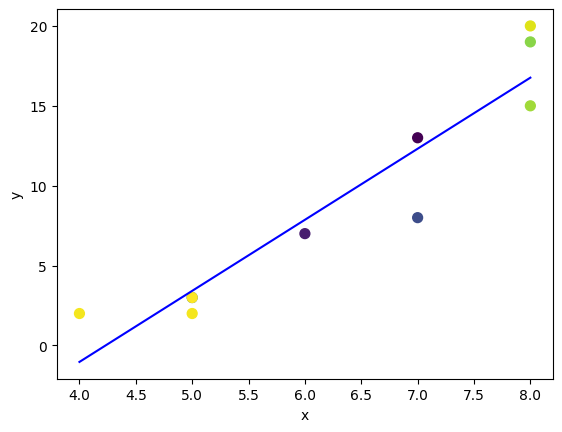

In [4]:
# plot data points
plt.scatter(x, y, area, colors, marker = "o")
# predicted response vector
y_pred = reg.intercept_ + reg.coef_[0]*x
# Vẽ đường thẳng với w0 và w1
plt.plot(x, y_pred, color = "b")
# putting labels
plt.xlabel('x')
plt.ylabel('y')
#show plot
plt.show()

In [5]:
#Tính RSS
def rss(y, y_pred):
    n = len(y)
    rss = sum([(y[i] - y_pred[i]) ** 2 for i in range(n)])
    return rss
RSS=rss(y,y_pred)
#Tính TSS
def tss(y):
    y_mean = sum(y) / len(y)
    tss = sum([(y[i] - y_mean) ** 2 for i in range(len(y))])
    return tss
TSS=tss(y)
#Tính R-squared theo slide 10
r_squared= 1-RSS/TSS
print('R-squared theo công thức slide 10: ',r_squared)

R-squared theo công thức slide 10:  0.8883598095314313


In [6]:
#Tạo thêm 1 điểm dữ liệu cách rất xa 10 điểm dữ liệu ban đầu
x = np.append(x, 6)
y = np.append(y, 35)
#Tính lại w0,w1 theo công thức, in ra
w0ct,w1ct=linear_regression(x,y)
print('w1 được tính lại:', w1ct)
print('w0 được tính lại', w0ct)

w1 được tính lại: 4.081081081081081
w0 được tính lại -14.054054054054053


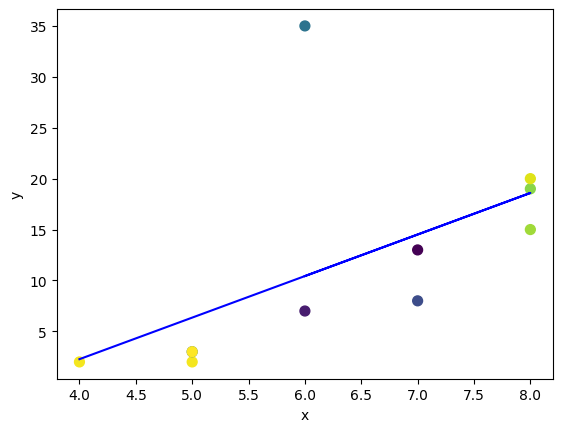

In [7]:
#Vẽ đường thằng với w0 và w1 mới
colors=np.append(colors,np.random.rand(1))
plt.scatter(x, y, area, colors, marker = "o")
# predicted response vector
y_pred = w0ct + w1ct*x
# Vẽ đường thẳng tới w0 và w1
plt.plot(x, y_pred, color = "b")
# putting labels
plt.xlabel('x')
plt.ylabel('y')
#show plot
plt.show()

In [8]:
#Tính lại R-square và in ra
r_squared=1-rss(y,y_pred)/tss(y)
print('Tính lại R-squared: ',r_squared)

Tính lại R-squared:  0.31929701722447823
